0. Определяем в какой среде проект: локально или Google Colab

In [57]:
import os
import sys

# Google Colab? Проверяем по пути
if "google.colab" in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')

# Путь к проекту в Google Drive
    project_path = "/content/drive/MyDrive/MyPyTorch/notebooks/"
    %cd $project_path
    sys.path.append(".")
else:
    project_path = os.path.abspath(".")
    sys.path.append(project_path)


1. Импорт модулей

In [47]:
import sys
import os

sys.path.append(os.path.abspath(".."))

from model import LinearClassifier
from data_utils import get_2d_classification_data
from train import train_model

import torch
import inspect
print("torch.__file__-->",torch.__file__)
print("search path head -->", sys.path[0])

import torch.nn as nn
print(nn.ReLU)
import torch.optim as optim

torch.__file__--> c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\__init__.py
search path head --> c:\Users\user\AppData\Local\Programs\Python\Python311\python311.zip
<class 'torch.nn.modules.activation.ReLU'>


2. Подготовка данных и модели

In [48]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = LinearClassifier().to(device)
dataloader = get_2d_classification_data(batch_size=32)

loss_fn = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

3. Обучение модели

In [49]:
train_model(
    model=model,
    dataloader=dataloader,
    loss_fn = loss_fn,
    optimizer=optimizer,
    device=device,
    epochs=50
)



Epoch 01 | Loss: 13.0920 | Accuracy:  0.7790
Epoch 02 | Loss: 2.4815 | Accuracy:  0.9890
Epoch 03 | Loss: 1.3912 | Accuracy:  0.9920
Epoch 04 | Loss: 1.3286 | Accuracy:  0.9920
Epoch 05 | Loss: 1.3251 | Accuracy:  0.9910
Epoch 06 | Loss: 1.3754 | Accuracy:  0.9910
Epoch 07 | Loss: 1.3117 | Accuracy:  0.9910
Epoch 08 | Loss: 1.2929 | Accuracy:  0.9910
Epoch 09 | Loss: 1.2625 | Accuracy:  0.9920
Epoch 10 | Loss: 1.2363 | Accuracy:  0.9920
Epoch 11 | Loss: 1.2719 | Accuracy:  0.9900
Epoch 12 | Loss: 1.3123 | Accuracy:  0.9910
Epoch 13 | Loss: 1.2739 | Accuracy:  0.9920
Epoch 14 | Loss: 1.2222 | Accuracy:  0.9920
Epoch 15 | Loss: 1.2575 | Accuracy:  0.9910
Epoch 16 | Loss: 1.3396 | Accuracy:  0.9910
Epoch 17 | Loss: 1.2853 | Accuracy:  0.9940
Epoch 18 | Loss: 1.2541 | Accuracy:  0.9900
Epoch 19 | Loss: 1.2251 | Accuracy:  0.9920
Epoch 20 | Loss: 1.2180 | Accuracy:  0.9920
Epoch 21 | Loss: 1.2097 | Accuracy:  0.9910
Epoch 22 | Loss: 1.2314 | Accuracy:  0.9930
Epoch 23 | Loss: 1.2083 | Accur

4. Сохранение весов

In [50]:
os.makedirs("checkpoints", exist_ok=True)
torch.save(model.state_dict(), "checkpoints/linear_model.pt")
print("Model saved to checkpoints/linear_model.pt")

Model saved to checkpoints/linear_model.pt


Ниже тестирование

5. Переводим модель в режим eval

In [51]:
from model import LinearClassifier
import torch

model = LinearClassifier()
model.load_state_dict(torch.load("checkpoints/linear_model.pt"))
model.eval()

LinearClassifier(
  (net): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=1, bias=True)
    (3): Sigmoid()
  )
)

6. Получаем новые данные для теста

In [52]:
from data_utils import get_2d_classification_data

test_loader = get_2d_classification_data(batch_size=128)

Прогоняем данные и считаем Accuracy

In [53]:
correct = 0
total = 0

with torch.no_grad():
    for xb, yb in test_loader:
        preds = model(xb)
        preds_class = (preds > 0.5).float()
        correct += ((preds_class == yb).float().sum()).item()
        total += yb.size(0)

acc = correct / total

print(f"Accuracy on new test data: {acc:.4f}")

Accuracy on new test data: 0.9920


Рисуем график

Генерируем данные

In [54]:
from sklearn.datasets import make_classification
import torch 

X, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=2.0,
    random_state=42
)

X = torch.tensor(X, dtype = torch.float32)
y = torch.tensor(y,dtype=torch.float32).view(-1,1)

Делаем предсказания

In [55]:
from model import LinearClassifier

model = LinearClassifier()
model.load_state_dict(torch.load("checkpoints/linear_model.pt"))
model.eval()

with torch.no_grad():
    preds = model(X)
    preds_class = (preds > 0.5).int().view(-1)

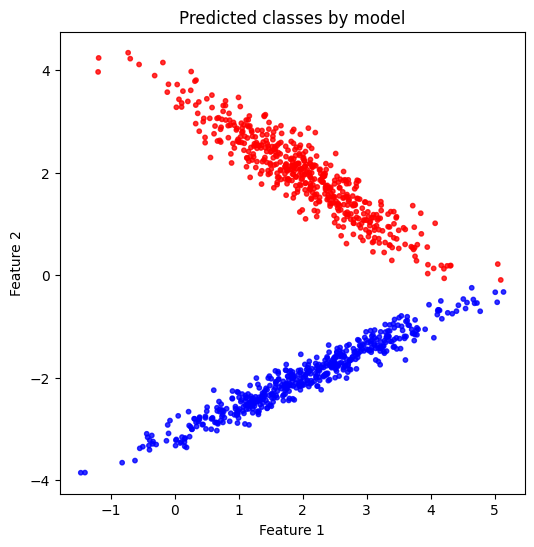

In [56]:
import matplotlib.pyplot as plt

X_np = X.numpy()
y_pred_np = preds_class.numpy()

plt.figure(figsize=(6,6))
plt.scatter(X_np[:,0], X_np[:, 1], c= y_pred_np, cmap = "bwr", s=10, alpha=0.8)
plt.title("Predicted classes by model")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid=True 
plt.show()